In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import os

In [44]:
directory_path = "dataset"

# List to hold DataFrames from each CSV file
dfs = []

# Iterate over each file in the directory
for file_name in os.listdir(directory_path):
    # Check if the file is a CSV
    if file_name.endswith('.csv'):
        # Construct full file path
        file_path = os.path.join(directory_path, file_name)
        # Read the CSV file
        df = pd.read_csv(file_path, sep=';', encoding='latin1')
        # Append the DataFrame to the list
        dfs.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
df = pd.concat(dfs, ignore_index=True)

In [45]:
if 'Velocity [km/h]' in df.columns and 'Velocity [km/h]]]' in df.columns:
    # Combine the two columns. Use the value from 'Velocity [km/h]]]' if 'Velocity [km/h]' is NaN, otherwise keep 'Velocity [km/h]'
    df['Velocity [km/h]'] = df['Velocity [km/h]'].combine_first(df['Velocity [km/h]]]'])
    
    # Now, you can drop the 'Velocity [km/h]]]' column as it is no longer needed
    df.drop(columns=['Velocity [km/h]]]'], inplace=True)
# Calculate the threshold for non-NaN values
non_nan_threshold = len(df) - 30794

# Drop columns where the number of non-NaN values is less than the threshold
df = df.dropna(axis=1, thresh=non_nan_threshold)
df = df.dropna()

df.isna().sum()


Time [s]                              0
Velocity [km/h]                       0
Elevation [m]                         0
Throttle [%]                          0
Motor Torque [Nm]                     0
Longitudinal Acceleration [m/s^2]     0
Regenerative Braking Signal           0
Battery Voltage [V]                   0
Battery Current [A]                   0
Battery Temperature [°C]              0
max. Battery Temperature [°C]         0
SoC [%]                               0
displayed SoC [%]                     0
min. SoC [%]                          0
max. SoC [%)                          0
Heating Power CAN [kW]                0
Requested Heating Power [W]           0
AirCon Power [kW]                     0
Heater Signal                         0
Ambient Temperature [°C]              0
Requested Coolant Temperature [°C]    0
Heat Exchanger Temperature [°C]       0
Cabin Temperature Sensor [°C]         0
dtype: int64

In [53]:
X = df[["SoC [%]", "displayed SoC [%]"]]  # Feature matrix with current column
y = df["max. SoC [%)"] - df["min. SoC [%]"]
# print(f"X: {np.size(X)} y: {np.size(y)}")

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

selector = SelectKBest(mutual_info_classif, k='all').fit(X_train, y_train)
X_train_selected = selector.transform(X_train)


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

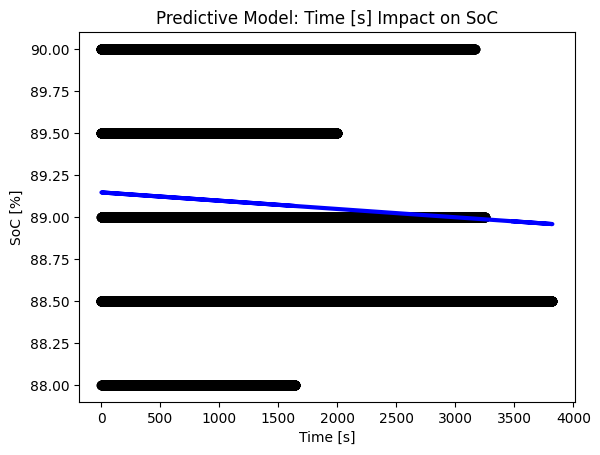

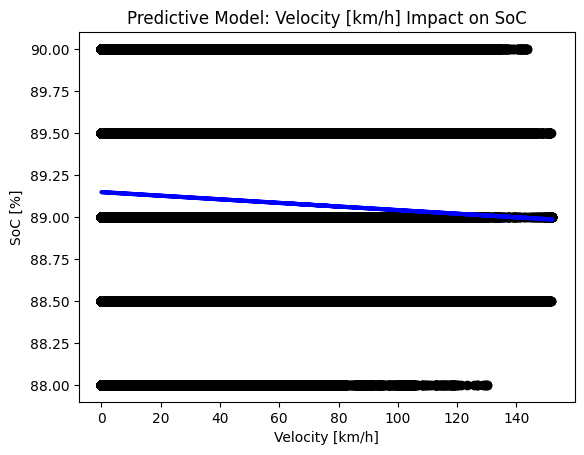

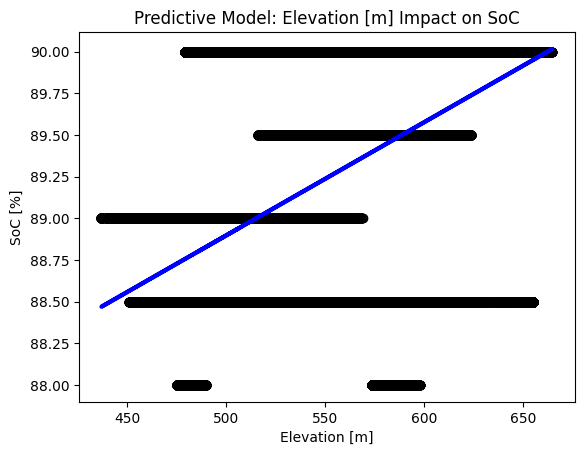

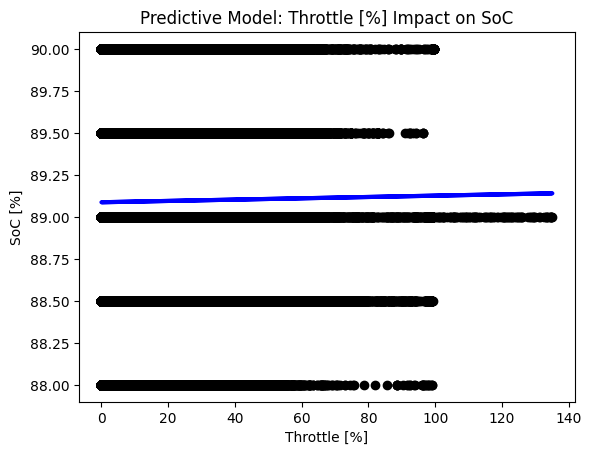

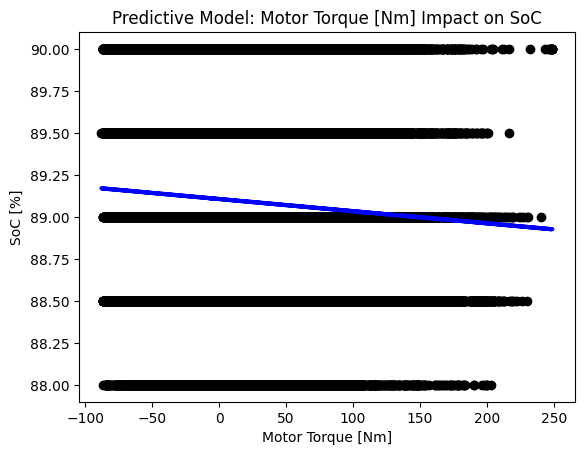

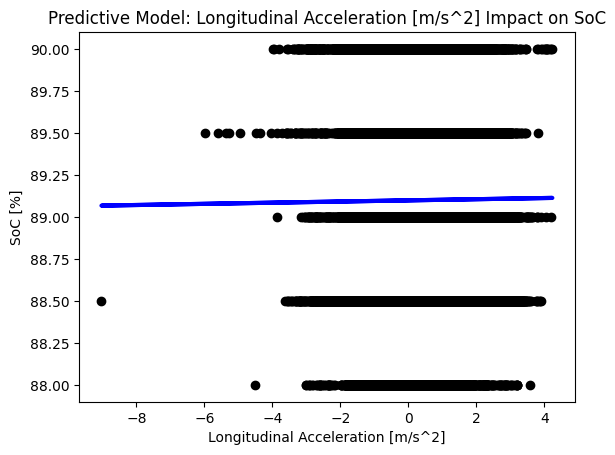

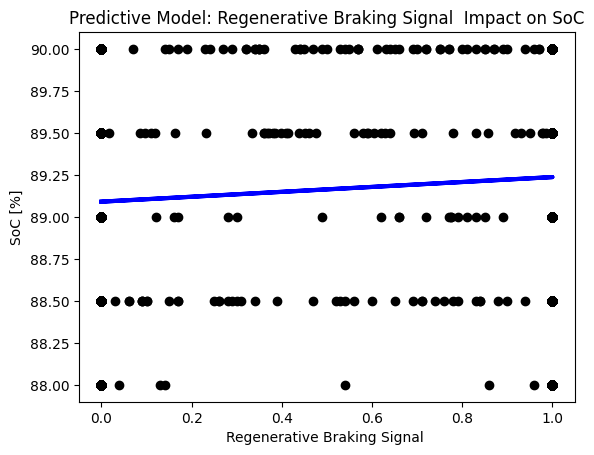

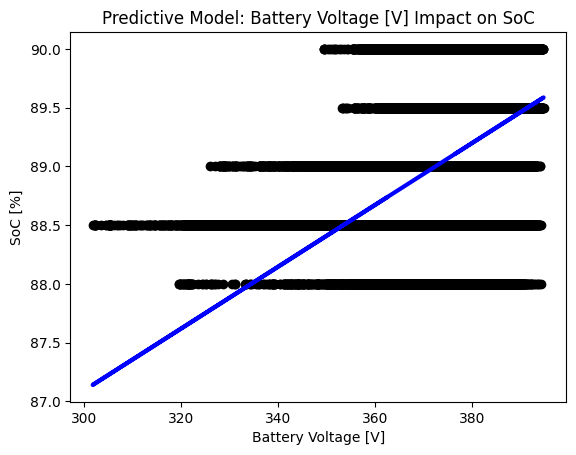

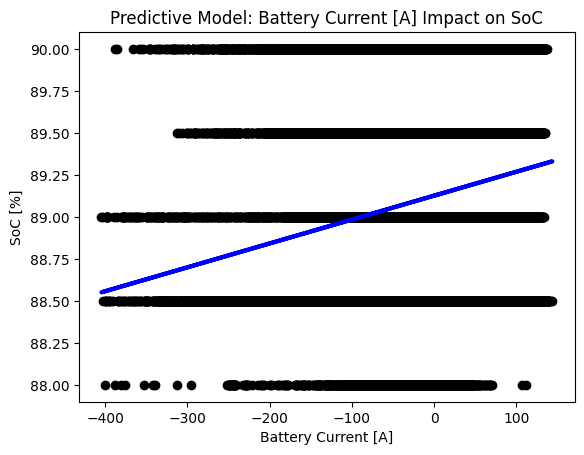

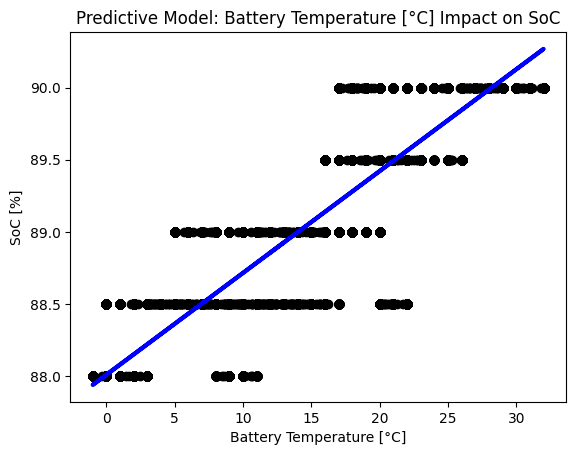

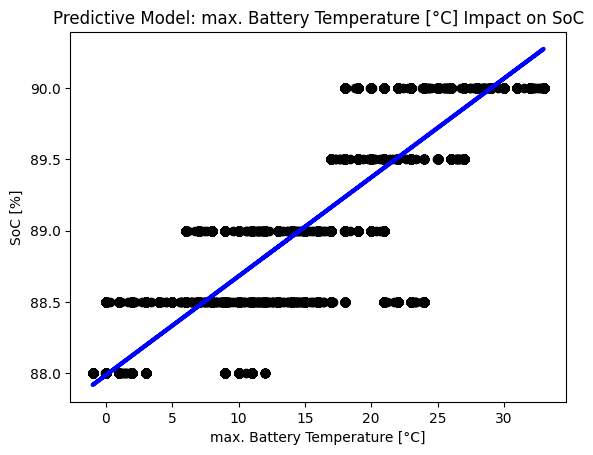

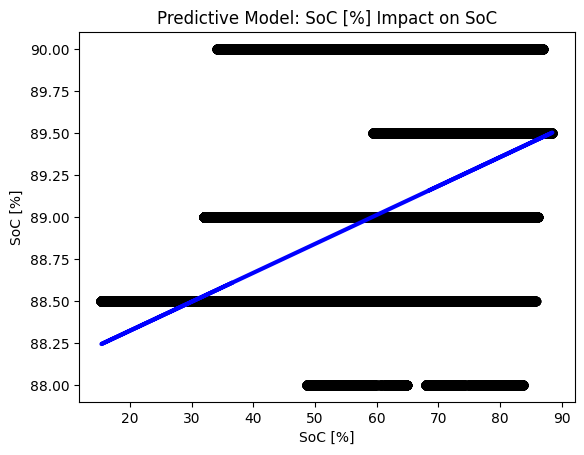

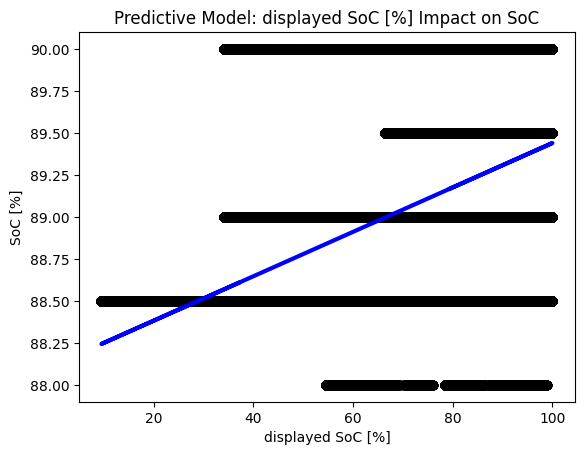

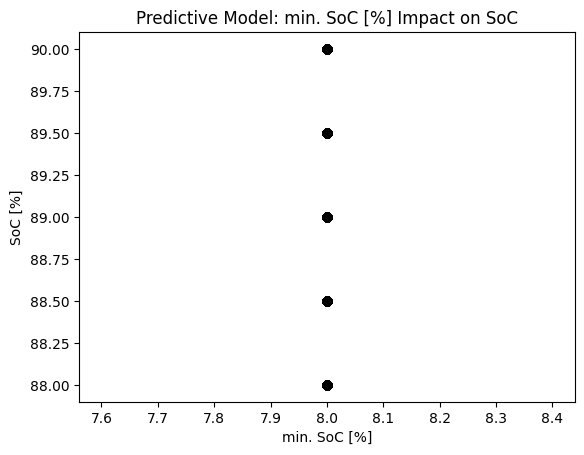

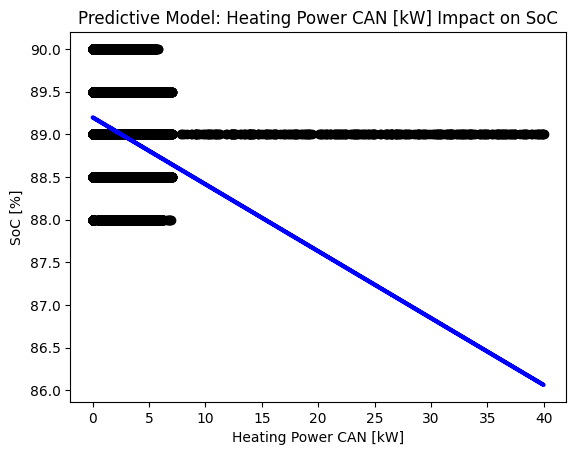

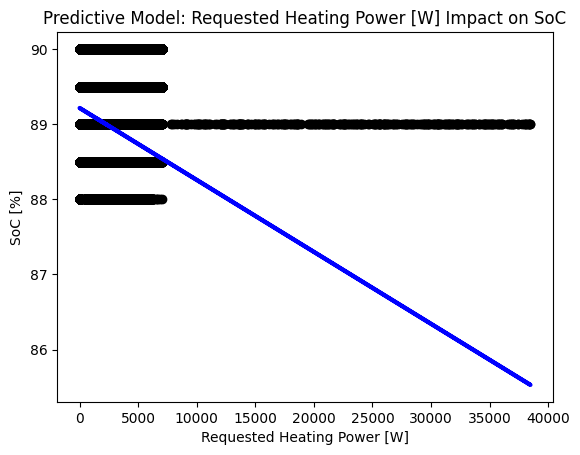

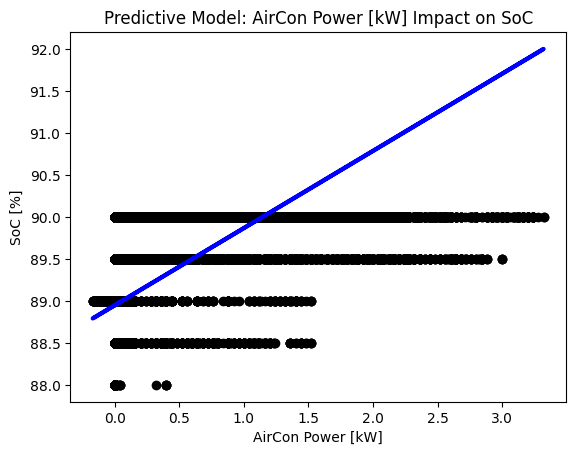

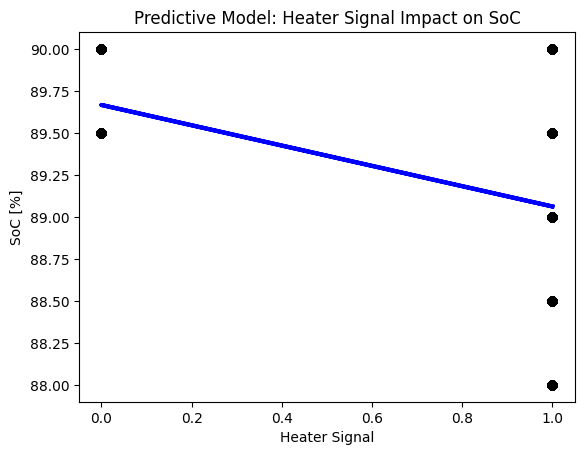

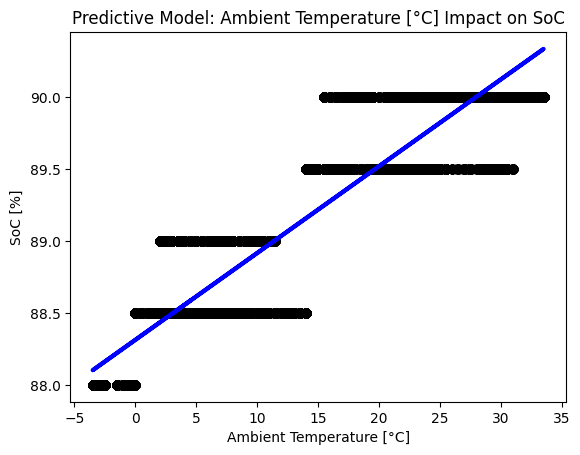

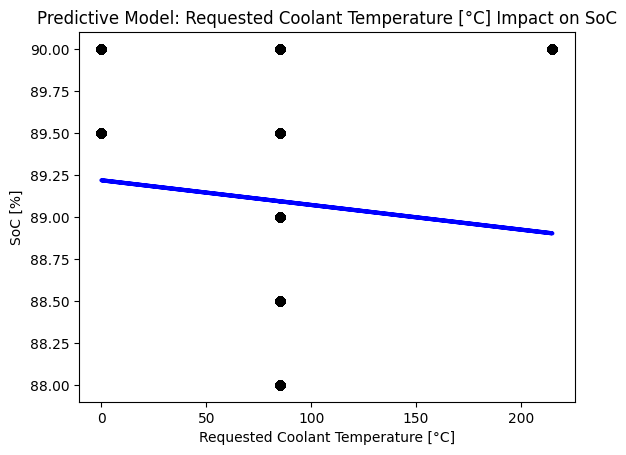

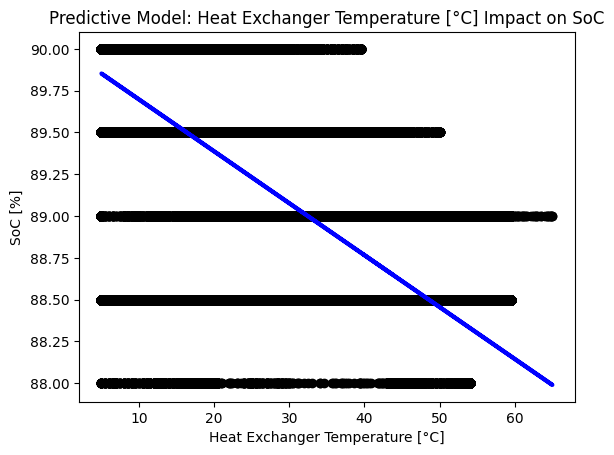

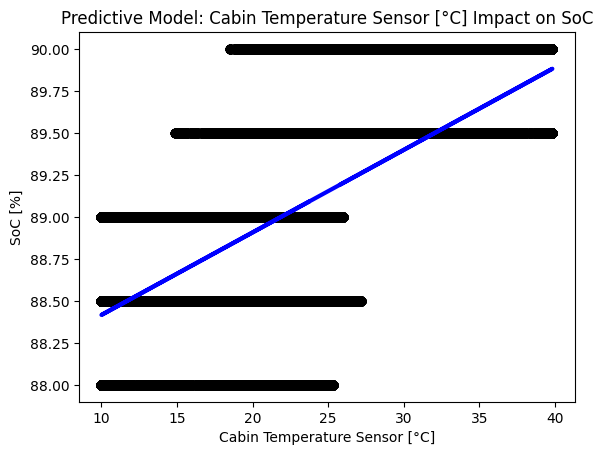

Ambient Temperature [°C]: RMSE = 0.0666368814529295
Battery Temperature [°C]: RMSE = 0.12238495080968798
max. Battery Temperature [°C]: RMSE = 0.12815131701188348
Heat Exchanger Temperature [°C]: RMSE = 0.16516929285042434
AirCon Power [kW]: RMSE = 0.2915518275124618
Battery Voltage [V]: RMSE = 0.30994977134406204
Elevation [m]: RMSE = 0.3245951405315365
SoC [%]: RMSE = 0.3386037047972753
displayed SoC [%]: RMSE = 0.33995263626919514
Cabin Temperature Sensor [°C]: RMSE = 0.3516660346297877
Requested Heating Power [W]: RMSE = 0.37820836423132875
Heater Signal: RMSE = 0.38791924639421593
Heating Power CAN [kW]: RMSE = 0.38792543203407054
Battery Current [A]: RMSE = 0.40508369362118735
Requested Coolant Temperature [°C]: RMSE = 0.4063098251028297
Time [s]: RMSE = 0.40698142739780285
Velocity [km/h]: RMSE = 0.40700611802020215
Regenerative Braking Signal : RMSE = 0.4077323848100922
Motor Torque [Nm]: RMSE = 0.40804940636206505
Throttle [%]: RMSE = 0.4085084729683336
Longitudinal Accelerati

In [41]:
# Target variable
y = df['max. SoC [%)']

# Exclude the target variable column and any non-numeric columns if necessary
columns_of_interest = df.select_dtypes(include=[np.number]).columns.drop('max. SoC [%)')

# Dictionary to store MSE for each variable
socre_of_interest = {}

for column in columns_of_interest:
    X = df[[column]]  # Feature matrix with current column
    # print(f"X: {np.size(X)} y: {np.size(y)}")

    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Creating and training the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predicting and evaluating
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    
    # Storing the MSE in the dictionary
    socre_of_interest[column] = mse

    # # Optional: plotting
    plt.scatter(X_test, y_test, color='black')
    plt.plot(X_test, predictions, color='blue', linewidth=3)
    plt.xlabel(column)
    plt.ylabel('Max SoC [%]')
    plt.title(f'Predictive Model: {column} Impact on SoC')
    plt.show()

sorted_socre_of_interest = sorted(socre_of_interest.items(), key=lambda item: item[1])


# Display MSE scores for each model
for column, rmse in sorted_socre_of_interest:
    print(f"{column}: Score = {rmse}")
